<a href="https://colab.research.google.com/github/Samwel-93/Week-4-Moringa-Autolib-Electric-Car-Sharing-Service/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2022_04_Samwel_Omondi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autolib-Electric-Car-Sharing-Service**





##**Project Background**
Working as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

An example of claim to test would be; 
> "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. 

>*The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest.*

To work on this project, we will perform the following analysis with Python; 

1. Find and deal with outliers, anomalies, and missing data within the dataset.
2. Plot appropriate univariate and bivariate summaries recording our observations.
3. Implement the solution by performing hypothesis testing.

The dataset to use for this project can be found here "http://bit.ly/DSCoreAutolibDataset"

> The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).






# 1.0 Defining the Hypothesis

The Data scientist claims that at any given period the number of blue cars taken from stattion 75015 has no difference with number of blue cars taken fro stattion 75017

*Null hypothesis:* The number of blue cars taken from station 75015 on equal to the number of blue cars taken from station 75017.

*Alternative hypothesis:* There is a difference between the number of blue cars taken from station 75015 and number of blue cars taken from station 75017.

> ma = number of blue cars taken from station 75015

> mu = number of blue cars taken from station 75017




Ho: ma = mu

H1: ma ≠ mu (Claim)





# 2.0 Reading the Data

## 2.1 Importing Libraries

In [1]:
# Import pandas
import pandas as pd
# Import Numpy
import numpy as np
# Import Seaborn
import seaborn as sns
# Import Matplotlib
import matplotlib.pyplot as plt
# Import scipy.stats
import scipy.stats as stats

## 2.2 Load Data

In [2]:
# We are provided with a dataset that contains a daily aggregation, by date and postal code, of the number of events on the Autolib network 
#
Dataset_URL = 'http://bit.ly/DSCoreAutolibDataset'
#
# Loading our dataset

autolib_df = pd.read_csv(Dataset_URL)

## 2.3 Preview Data

In [3]:
#View last 5 entries of our dataset
#
autolib_df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
#View last 10 entries of our dataset
#
autolib_df.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


# 3.0 Checking the Data

In [5]:
# Getting to know more about the dataset
# Access general information about our dataset
#

autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [6]:
# Check the number of records in our dataset
#
autolib_df.shape

(16085, 13)

In [7]:
# Examine data types of each column
#
autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# 4.0 Cleaning the Dataset

### 4.1 Change Column Data Types

In [8]:
# Change 'Postal code' and 'date' columns data types

# Postal Code from int to str
autolib_df['Postal code'] = autolib_df['Postal code'].astype(str)

# 'date' from object to datetime 
autolib_df['date'] = pd.to_datetime(autolib_df['date'])

# view changes
autolib_df.dtypes


Postal code                       object
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

### 4.2 Check and Update Column names

In [9]:
# Replace space with underscore in column names
#
autolib_df.columns = autolib_df.columns.str.replace(' ','_')
autolib_df.columns

Index(['Postal_code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [10]:
# Delete '_sum' from column names
autolib_df.columns = autolib_df.columns.str.replace('_sum','')
autolib_df.columns

Index(['Postal_code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken', 'BlueCars_returned', 'Utilib_taken',
       'Utilib_returned', 'Utilib_14_taken', 'Utilib_14_returned',
       'Slots_freed', 'Slots_taken'],
      dtype='object')

### 4.3 Dataset Validity

In [11]:
# Here we shall create a dataframe that is relevant to our analysis
# Our new dataframe should have 'Postal_code', 'date', 'BlueCars_taken' and 'day_type'
# In the postal code column we are specifically interested in '75015' & '75017' area codes.

bluecar_df = autolib_df[['Postal_code', 'date','BlueCars_taken','day_type']][(autolib_df['Postal_code']=='75015')|(autolib_df['Postal_code']=='75017')]
bluecar_df

,Postal_code,date,BlueCars_taken,day_type
2184,75015,2018-01-01,781,weekday
2185,75015,2018-01-02,710,weekday
2186,75015,2018-01-03,739,weekday
2187,75015,2018-01-04,669,weekday
2188,75015,2018-01-05,852,weekday
...,...,...,...,...
2647,75017,2018-06-15,766,weekday
2648,75017,2018-06-16,859,weekend
2649,75017,2018-06-17,729,weekend
2650,75017,2018-06-18,650,weekday


### 4.4 Checking for outliers

In [12]:
# Summary statistics to determine whether or not the dataset has outliers
#
bluecar_df.describe()

,BlueCars_taken
count,312.000000
mean,815.724359
std,180.166182
min,38.000000
25%,713.000000
50%,783.500000
75%,920.750000
max,1352.000000


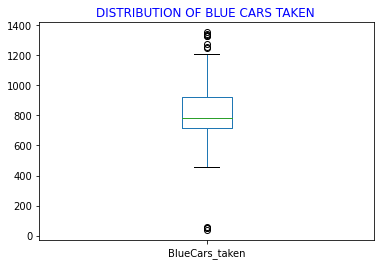

In [13]:
# Visualization of outliers using boxplot
#
#plot the blue car counter plotbox

bluecar_df.boxplot(column=['BlueCars_taken'], grid=False)
plt.title('DISTRIBUTION OF BLUE CARS TAKEN ' ,color='b')
plt.show()


As shown above, we exist outliers in out dataset that we may have to remove

In [14]:
#Dealing with outliers
# Entries on dates '2018-06-19' and '2018-02-24' are significantly lower compared to the rest of the usuals hence we drop them 
bluecar_df2 = bluecar_df.drop(bluecar_df[(bluecar_df.date=='2018-06-19')|(bluecar_df.date=='2018-02-24')].index)

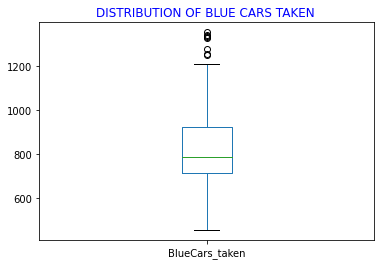

In [15]:
# Checking  for outliers 
bluecar_df2.boxplot(column=['BlueCars_taken'], grid=False)
plt.title('DISTRIBUTION OF BLUE CARS TAKEN ' ,color='b')
plt.show()

> We shall retain the remaining outliers shown above. No justifiable reason as to why we should remove them.

### 4.5 Checking for *Anomalies*

In [16]:
bluecar_df2.describe()


,BlueCars_taken
count,308.000000
mean,825.681818
std,158.502816
min,457.000000
25%,715.000000
50%,787.000000
75%,923.500000
max,1352.000000


No anomalies identified on our current dataset. 

### 4.6 Checking for Missing Data

In [17]:
#Examining the null values in the dataset

bluecar_df2.isnull().sum()

Postal_code       0
date              0
BlueCars_taken    0
day_type          0
dtype: int64

> There are no missing values in our dataset

### 4.7 More data cleaning procedures

In [18]:
# Checking for duplicates
bluecar_df2.duplicated().sum()

0

> There are no duplicates values in our dataset

In [19]:
#View our cleaned dataset
bluecar_df2

,Postal_code,date,BlueCars_taken,day_type
2184,75015,2018-01-01,781,weekday
2185,75015,2018-01-02,710,weekday
2186,75015,2018-01-03,739,weekday
2187,75015,2018-01-04,669,weekday
2188,75015,2018-01-05,852,weekday
...,...,...,...,...
2646,75017,2018-06-14,710,weekday
2647,75017,2018-06-15,766,weekday
2648,75017,2018-06-16,859,weekend
2649,75017,2018-06-17,729,weekend


# 5.0 Sampling

### 5.1 Sampling Approach/Method



A stratified random sampling technique will be used in selecting a sample for this study. We shall group the dataset by postal_code, in our case we are looking at activities in 75015 & 75017. We shall then extract sample units from each group.

### 5.2 Sample Size

In [20]:
# In determining the sample size for our study,  Yamane Formula will  be used as shown below: n = N/ (1+N (e)^2)
# Apply a margin of error set at 0.05(5%)

bluecar_sample = bluecar_df2.groupby('Postal_code', group_keys=False).apply(lambda x : x.sample(replace='False', frac=((308/(1+308*(0.05**2)))/308)))

print(bluecar_sample['Postal_code'].value_counts())


75015    87
75017    87
Name: Postal_code, dtype: int64


Based on Yamane (1967) calculation, the sample size for this study is 87 per group. 

# 6.0 Exploratory Data Analysis

### 6.1 Univariate Analysis

Measures of Central Tendency & Dispersion

i. Mean

In [21]:
bluecar_sample['BlueCars_taken'].mean()

832.3563218390805

ii. Mode

In [22]:
bluecar_sample['BlueCars_taken'].mode()

0    686
1    732
dtype: int64

iii. Median

In [23]:
bluecar_sample['BlueCars_taken'].median()

773.0

iv. Variance

In [24]:
bluecar_sample['BlueCars_taken'].var()

30552.843399109686

v. Standard Deviation

In [25]:
bluecar_sample['BlueCars_taken'].std()

174.79371670374678

vi. Range

In [55]:
mx_taken = bluecar_sample['BlueCars_taken'].max()
mn_taken = bluecar_sample['BlueCars_taken'].min()

range = mx_taken - mn_taken
range

746

vii. Quartiles

In [27]:
bluecar_sample['BlueCars_taken'].quantile([0.25,0.5,0.75])

0.25    716.50
0.50    773.00
0.75    897.75
Name: BlueCars_taken, dtype: float64

viii. Interquartile range

In [28]:
Q3 = bluecar_sample['BlueCars_taken'].quantile(0.75)
Q1 = bluecar_sample['BlueCars_taken'].quantile(0.25)

IQR = Q3 - Q1
IQR

181.25

ix. Skewness

In [29]:
bluecar_sample['BlueCars_taken'].skew()

1.2895245748460493

x. Kurtosis

In [30]:
bluecar_sample['BlueCars_taken'].kurt()

1.0863341031145448

#### 6.2 Visualizations

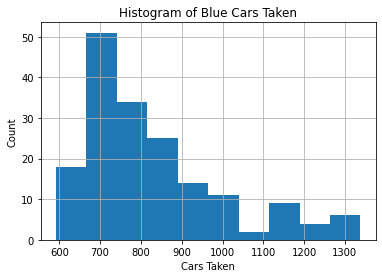

In [50]:
#Plot a histogram to show distribution of bluecars taken 
bluecar_sample['BlueCars_taken'].hist()
plt.xlabel('Cars Taken')

plt.title('Histogram of Blue Cars Taken')

plt.show()

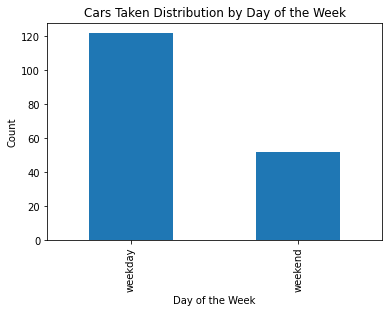

In [34]:
# Plot a bar gragh to show the days of the week with the highest bluecars take rate. 
bluecar_sample.day_type.value_counts().plot.bar()
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Cars Taken Distribution by Day of the Week')
plt.show()

**Observation**
Most bluecars are taken during the weekday comapred to weekends. 


### 6.2 Bivariate Analysis

Text(0.5, 1.0, 'Bank account ownership by country')

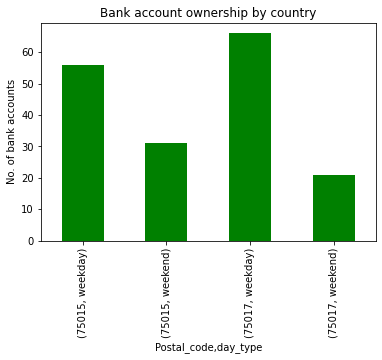

In [35]:
#Visualisation to find out count of blue cars taken by postal code and day of the week. 
bluecar_taken = bluecar_sample.groupby (['Postal_code','day_type'])['day_type'].count()
bluecar_taken.plot.bar( color='blue')
plt.ylabel('No. of blue cars')
plt.title('Blue Cars taken by Day of the week & area')

**Observation**
> Highest area with blue cars taken on a weekday is 75017, whereas 75015 leads in the number of blue cars taken on the weekend.

# 7.0 Hypothesis Testing

The most suitable hypothesis test that we shall use in this study is a t-test but before we do that we need to create two subsets grouped by postal code (area of interest).

In [49]:
# 75015 sample data for blue cars taken on weekends subset
bluecar_sample15 =  bluecar_sample[['Postal_code', 'BlueCars_taken']][(bluecar_sample['Postal_code']=='75015')]
bluecar_sample15



,Postal_code,BlueCars_taken
2244,75015,733
2185,75015,710
2253,75015,811
2288,75015,757
2222,75015,703
...,...,...
2309,75015,625
2326,75015,1032
2230,75015,943
2215,75015,880


In [48]:
# 75017 sample data for blue cars taken on weekdays subset
bluecar_sample17 =  bluecar_sample[['Postal_code', 'BlueCars_taken']][(bluecar_sample['Postal_code']=='75017')]
bluecar_sample17

,Postal_code,BlueCars_taken
2506,75017,713
2604,75017,762
2532,75017,700
2606,75017,686
2522,75017,929
...,...,...
2554,75017,872
2620,75017,673
2551,75017,629
2606,75017,686


In [56]:
# Conduct the independent Welch's t-test using scipy.stats, use the stats.ttest_ind() method with 0.05 as the significance level

stat,p = stats.ttest_ind(bluecar_sample15['BlueCars_taken'], bluecar_sample17 ['BlueCars_taken'], equal_var=False)

print('Statistic=%.14f, pvalue=%.14f' % (stat, p))



Statistic=8.73562533672185, pvalue=0.00000000000002


In [57]:
# Interpretation of the conducted test
alpha = 0.05 

if p <= alpha:
	print('Reject the null hypothesis')
else:
	print('Do not reject the null hypothesis')

Reject the null hypothesis


#**Conclusion**

Based on the above test, we find that the p-value of 0.0.00000000000002 is less than the alpha value of 0.05 hence we reject the null hypothesis. We can therefore conclude that the is a significant difference between the number of blue cars taken from station 75015 and number of blue cars taken from station 75017.